In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Зчитаємо архів  Customer Shopping Trends Dataset. Далі працюємо з файлом shopping_trends.csv. Загрузимо цей файл. Перевіримо розмір таблиці, наявність пропусків, тип стовпців.  

In [2]:
data = pd.read_csv('shopping_trends.csv', delimiter=',')

Перевіряємо розмір таблиці

In [3]:
data.shape

(3900, 19)

Перевіряємо наявність пропусків

In [4]:
data.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

Перевіряємо тип стовпців

In [5]:
data.dtypes

Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

Застосуємо алгоритм K-means для кластеризації даних

Підготовка даних

1.	Вибираємо вищезазначені числові стовпці і створюємо новий DataFrame, який буде містити лише ці стовпці. Рекомендовано перейменувати стовпці (з маленької букви, пробіл замінити підкресленням).

In [6]:
columns = ["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]
new_data = data[columns]
new_data.columns = ["age", "purchase_amount", "review_rating", "previous_purchases"]

2.	Проведемо масштабування даних, щоб всі числові ознаки мали однаковий масштаб (можна використовувати будь-який метод).

In [7]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_data)

Визначення кількості кластерів

In [8]:
a = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    a.append(kmeans.inertia_)

Побудуємо графік вартості кластерів

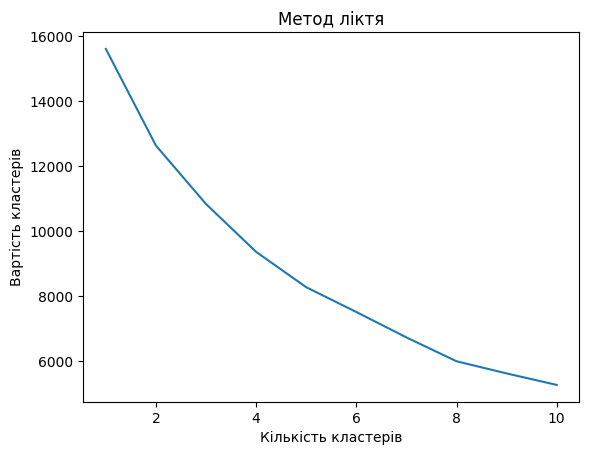

In [9]:
plt.plot(range(1, 11), a)
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Вартість кластерів')
plt.show()

Використовуємо оптимальну кількість кластерів для K-means

In [10]:
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

Розділяємо дані на кластери і призначаємо кожному об'єкту ідентифікатор кластера.

In [ ]:
new_data['cluster'] = kmeans.fit_predict(new_data)

In [12]:
new_data.head()

,age,purchase_amount,review_rating,previous_purchases,cluster
0,55,53,3.1,14,0
1,19,64,3.1,2,1
2,50,73,3.1,23,1
3,21,90,3.5,49,1
4,45,49,2.7,31,0


В ході практичної роботи я використовував метод ліктя (Elbow Method), щоб визначити оптимальну кількість кластерів. Побудував графік вартості кластерів відносно кількості кластерів, розділив дані на кластери і призначив кожному об'єкту ідентифікатор кластера.